# 1. Import Library

In [32]:
from keras.datasets import cifar100
import numpy as np
import random
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
np.random.seed(10)

# 資料準備

In [33]:
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar100.load_data()

In [34]:
label = [7, 13, 15, 28, 31, 44, 48, 53, 64, 69, 70, 78, 83, 95]

index = np.where(y_label_train.reshape(-1) == 0)
X_train = x_img_train[index]
Y_train = y_label_train[index] 

index = np.where(y_label_test.reshape(-1) == 0)
X_test = x_img_test[index]
Y_test = y_label_test[index] 

for (id,i) in enumerate(label):
  index = np.where(y_label_train.reshape(-1) == i)
  x_sub_train = x_img_train[index]
  y_sub_train = (id+1)*np.ones(y_label_train[index].shape)
  X_train = np.concatenate((X_train, x_sub_train),axis=0)
  Y_train = np.concatenate((Y_train, y_sub_train),axis=0)

  index = np.where(y_label_test.reshape(-1) == i)
  x_sub_test = x_img_test[index]
  y_sub_test = (id+1)*np.ones(y_label_test[index].shape)
  X_test = np.concatenate((X_test, x_sub_test),axis=0)
  Y_test = np.concatenate((Y_test, y_sub_test),axis=0)
# x_img_test = x_img_test[index]
# y_label_test = y_label_test[index]

In [35]:
print("train data:",'images:',X_train.shape,
      " labels:",Y_train.shape) 
print("test  data:",'images:',X_test.shape ,
      " labels:",Y_test.shape) 


train data: images: (7500, 32, 32, 3)  labels: (7500, 1)
test  data: images: (1500, 32, 32, 3)  labels: (1500, 1)


In [36]:
X_train, Y_train = shuffle(X_train,Y_train)
X_test, Y_test = shuffle(X_test,Y_test)

In [37]:
label = [7, 13, 15, 24, 31, 44, 48, 53, 64, 69, 74, 78, 83, 92]
label_dict={0:"apple", 1:"beetle", 2:"bus", 3:"camel", 4:"cups", 5:"elephant", 6:"lizard", 7:"motorcycle", 8:"oranges",9:"mouse", 10:"rocket", 11:"roses", 12:"snake", 13:"sweet peppers", 14:"whale"}

In [38]:
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    ran = random.sample(range(0, idx), num)
    for (i,index) in enumerate(ran):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[index],cmap='binary')
                
        title=str(i)+':'+label_dict[labels[index][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[index]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

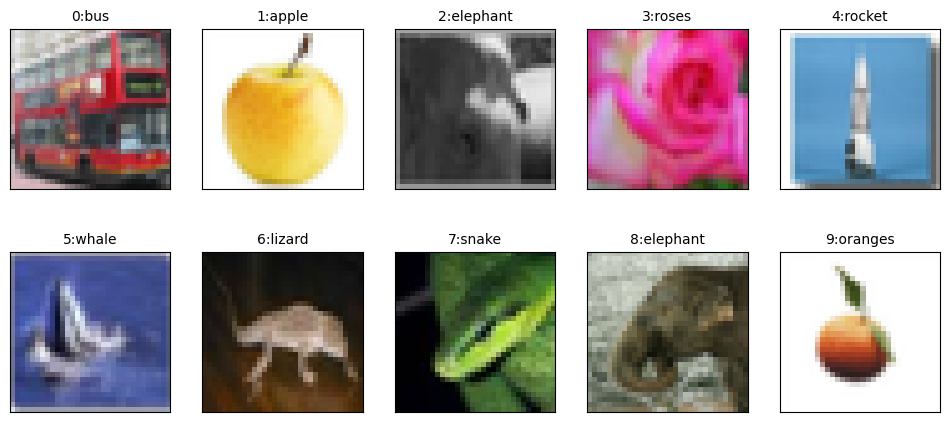

In [39]:
plot_images_labels_prediction(X_test,Y_test,[],1500,10)

進行標準化,提高準確率

In [40]:
x_img_train_normalize = X_train.astype('float32') / 255.0
x_img_test_normalize = X_test.astype('float32') / 255.0

將圖片預先做好的標籤欄位轉換為Onehot encoding,方便後續繪制圖表時直接代入標籤文字

In [41]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(Y_train)
y_label_test_OneHot = np_utils.to_categorical(Y_test)

In [42]:
print("train data:",'images:',x_img_train_normalize.shape,
      " labels:",y_label_train_OneHot.shape) 
print("test  data:",'images:',x_img_test_normalize.shape ,
      " labels:",y_label_test_OneHot.shape) 


train data: images: (7500, 32, 32, 3)  labels: (7500, 15)
test  data: images: (1500, 32, 32, 3)  labels: (1500, 15)


In [43]:
y_label_test_OneHot[1300]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

# 建立模型

In [44]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [45]:
model = Sequential()

In [46]:
#卷積層1
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))
model.add(Dropout(rate=0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [47]:
#卷積層2與池化層2
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(Dropout(0.20))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [48]:
#卷積層3與池化層3
model.add(Conv2D(filters=128, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(Dropout(0.20))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [49]:
#Step3	建立神經網路(平坦層、隱藏層、輸出層)
#平坦層
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [50]:
#隱藏層
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [51]:
#輸出層
model.add(Dense(15, activation='softmax'))

In [52]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 dropout_5 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 dropout_6 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

# 訓練模型

In [53]:
model.compile(loss='categorical_crossentropy',
              optimizer='SGD', metrics=['accuracy'])

設定損失函數,在深度學習中通常會使用cross entropy交叉熵,訓練效果較好

In [54]:
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=200, batch_size=128, verbose=1)          

Epoch 1/200
47/47 [==============================] - 28s 586ms/step - loss: 2.7108 - accuracy: 0.0837 - val_loss: 2.6886 - val_accuracy: 0.1567
Epoch 2/200
47/47 [==============================] - 26s 558ms/step - loss: 2.6497 - accuracy: 0.1372 - val_loss: 2.6464 - val_accuracy: 0.1613
Epoch 3/200
47/47 [==============================] - 25s 537ms/step - loss: 2.5441 - accuracy: 0.1770 - val_loss: 2.5448 - val_accuracy: 0.1967
Epoch 4/200
47/47 [==============================] - 25s 536ms/step - loss: 2.3975 - accuracy: 0.2005 - val_loss: 2.4384 - val_accuracy: 0.1967
Epoch 5/200
47/47 [==============================] - 25s 541ms/step - loss: 2.3320 - accuracy: 0.2130 - val_loss: 2.3572 - val_accuracy: 0.2833
Epoch 6/200
47/47 [==============================] - 23s 494ms/step - loss: 2.2549 - accuracy: 0.2297 - val_loss: 2.3295 - val_accuracy: 0.2800
Epoch 7/200
47/47 [==============================] - 25s 534ms/step - loss: 2.2389 - accuracy: 0.2437 - val_loss: 2.2820 - val_accuracy:

In [55]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc, acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    if acc == True:
      plt.ylabel('Accuracy')
    else:
      plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

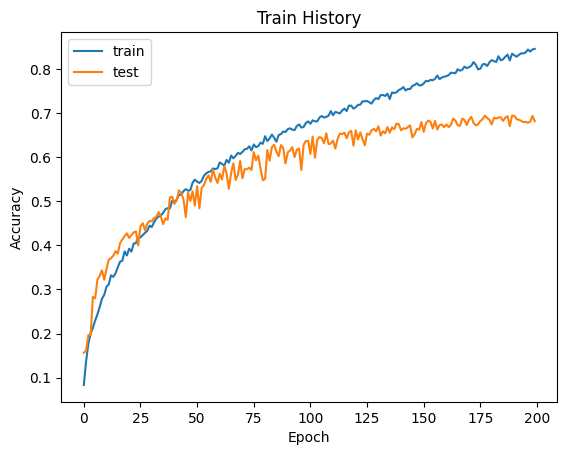

In [56]:
show_train_history('accuracy','val_accuracy', True)

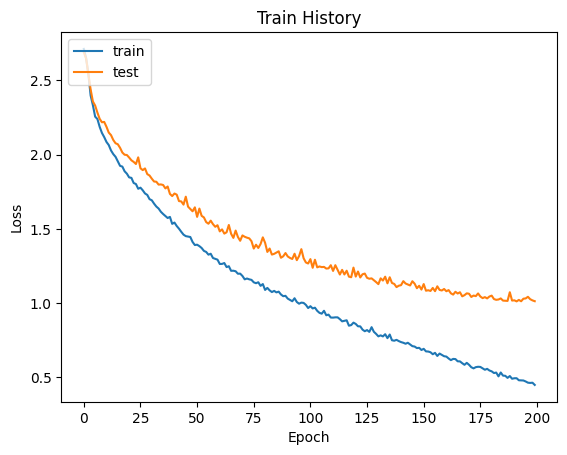

In [57]:
show_train_history('loss','val_loss', False)

# 評估模型準確率

In [58]:
scores = model.evaluate(x_img_test_normalize, 
                        y_label_test_OneHot, verbose=0)
scores[1]

0.6806666851043701

# 查看預測結果

In [59]:
prediction=np.argmax(model.predict(x_img_test_normalize), axis=-1)

47/47 [==============================] - 1s 28ms/step


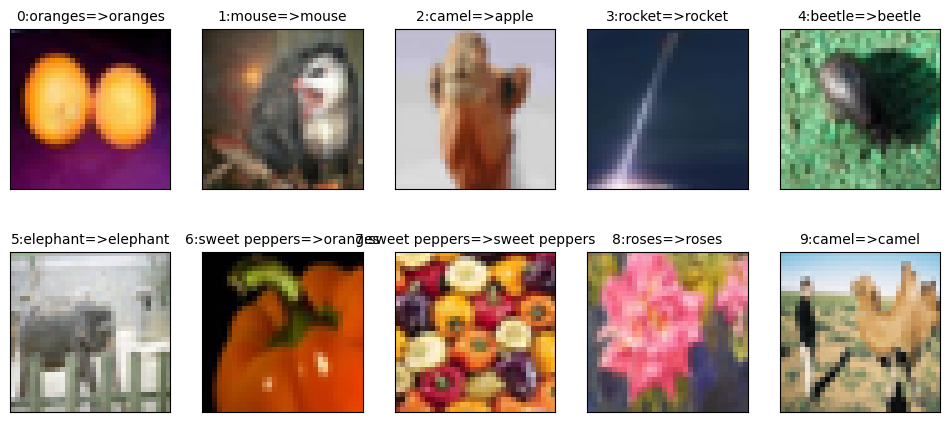

In [60]:
plot_images_labels_prediction(X_test,Y_test,prediction,1500,10)

# Confusion matrix

In [61]:
import pandas as pd
print(label_dict)
pd.crosstab(Y_test.reshape(-1),prediction,
            rownames=['label'],colnames=['predict'])

{0: 'apple', 1: 'beetle', 2: 'bus', 3: 'camel', 4: 'cups', 5: 'elephant', 6: 'lizard', 7: 'motorcycle', 8: 'oranges', 9: 'mouse', 10: 'rocket', 11: 'roses', 12: 'snake', 13: 'sweet peppers', 14: 'whale'}


predict,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
label,,,,,,,,,,,,,,,
0.0,83,1,0,0,0,0,3,1,1,0,0,3,3,5,0
1.0,0,64,1,0,3,0,8,5,0,1,0,1,14,2,1
2.0,0,0,74,4,0,4,2,6,0,2,0,0,6,0,2
3.0,1,0,3,46,1,17,9,1,2,4,0,0,14,0,2
4.0,0,3,0,4,76,0,6,0,1,2,0,1,4,0,3
5.0,0,5,0,9,2,63,6,1,0,8,0,0,5,0,1
6.0,0,4,4,3,2,1,61,1,1,6,0,0,16,1,0
7.0,0,3,2,0,1,2,2,84,0,0,0,0,6,0,0
8.0,2,2,2,0,0,0,1,0,87,1,0,0,2,3,0


# Save model to Google Drive

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
